# Random Forest Project - Solution

We will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). 

Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

This data is from before they even went public. It is available on [kaggle](https://www.kaggle.com/datasets/urstrulyvikas/lending-club-loan-data-analysis). 

We will use lending data and be trying to classify and predict whether or not the borrower paid back their loan in full. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading Dataset

In [2]:
df = pd.read_csv('loan_data.csv')

## Inspecting Dataset

In [3]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Conclusions
1. There are in total of 13 features
2. 12 features are quantitative and 1 is qualitative
3. The target variable is a binary classification
4. There are no missing features.

## EDA

0    8045
1    1533
Name: not.fully.paid, dtype: int64

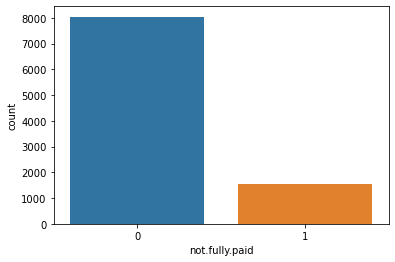

In [6]:
# Analysing some particular features
sns.countplot(x = 'not.fully.paid' , data = df,)
df['not.fully.paid'].value_counts()

There is a **irregularity** in the number of loans completely paid back and the ones that didn't. **Models like logistic regression will get skewd because of this.**

In [7]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

This makes the only object column categorical.

**FICO** is a much better way of evaluation of credit risk of a borrower. Let us compare it to the credit policy of LendingClub

<AxesSubplot:xlabel='fico', ylabel='Count'>

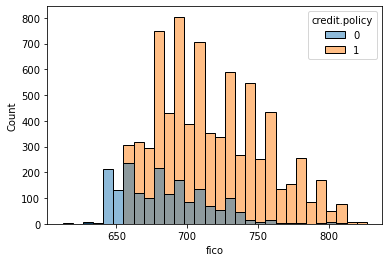

In [8]:
sns.histplot(x = 'fico' , data = df , hue = 'credit.policy',bins = 30)

As the FICO score increses the customer is more probable to fit into the credit policy

<AxesSubplot:xlabel='fico', ylabel='Count'>

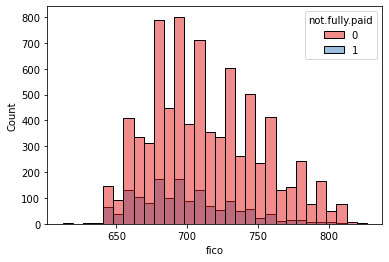

In [9]:
sns.histplot(x = 'fico' , data = df , hue = 'not.fully.paid',bins = 30,palette='Set1')

This is a little strange. Even with high FICO score, people haven't paid back their loans in full. FICO score doesn't seem to have too much effect.

<AxesSubplot:xlabel='purpose', ylabel='count'>

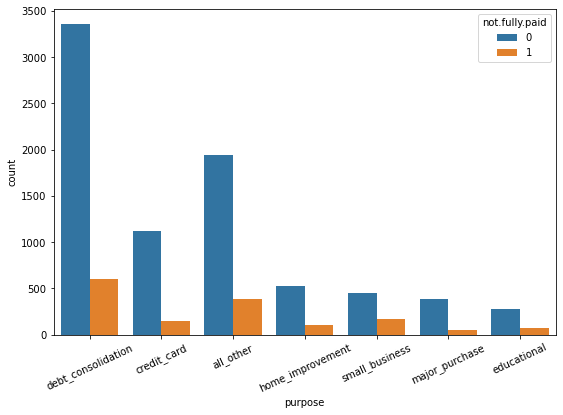

In [10]:
plt.figure(figsize=(9,6))
plt.xticks(rotation = 25)
sns.countplot(x = 'purpose' ,data = df, hue = 'not.fully.paid')

Some purposes have higher chances of loans being fully paid off. Like smally businesses are performing relatively better.

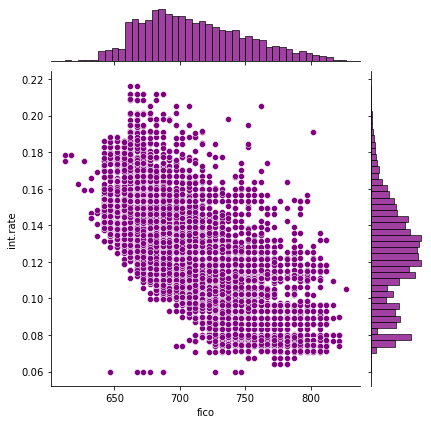

In [11]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

<Figure size 792x504 with 0 Axes>

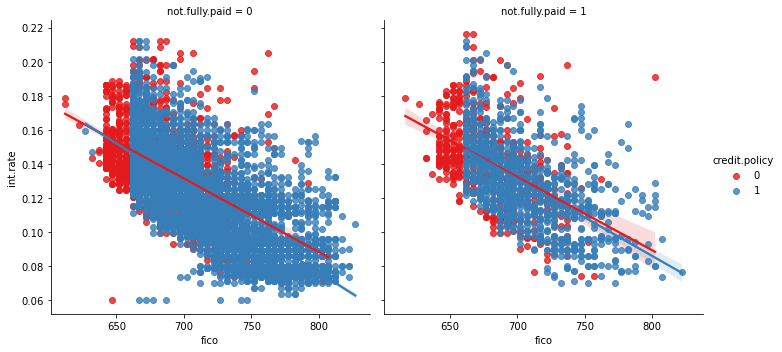

In [12]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

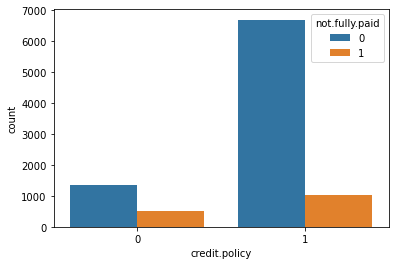

In [13]:
sns.countplot(x = 'credit.policy' , data = df,hue = 'not.fully.paid')

Shockingly, The percentage of Fraud is very less when it comes to entries with credit.policy = 0. Let's see by how much.

In [14]:
print ('When Credit Policy is 0 -'
    , (df[(df['credit.policy'] == 0) & (df['not.fully.paid'] == 1)].count() / df[(df['credit.policy'] == 0) ].count())[1]*100,'%')

print ('When Credit Policy is 1 -'
    , (df[(df['credit.policy'] == 1) & (df['not.fully.paid'] == 1)].count() / df[(df['credit.policy'] == 1) ].count())[1]*100,'%')


When Credit Policy is 0 - 27.783725910064238 %
When Credit Policy is 1 - 13.151750972762647 %


## Categorical Features

As we had seen, **purpose** column is categorical

That means we need to transform them using dummy variables (One Hot Encoding) so DecesionTree or Random Forest will be able to understand them. Let's do this using pd.get_dummies.

In [15]:
df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(['not.fully.paid'],axis = 1)
y = df['not.fully.paid']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### Implementing Decesion Treee

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
predictions = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

print (confusion_matrix(y_test,predictions))

[[1999  421]
 [ 333  121]]


In [21]:
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2420
           1       0.22      0.27      0.24       454

    accuracy                           0.74      2874
   macro avg       0.54      0.55      0.54      2874
weighted avg       0.76      0.74      0.75      2874



These are extremely inaccurate results especially when it comes to predicting cases that have paid.

This can however be seen from the fact that count of zero is far more than count of 1

### Implementing Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
rfc_predictions = rfc_model.predict(X_test)

In [24]:
confusion_matrix(y_test,rfc_predictions)

array([[2412,    8],
       [ 441,   13]], dtype=int64)

In [25]:
# Let's play with no. of estimators

def maximisingTP(n_estimators,X_train,X_test,y_train,y_test):
    rfc_test_model = RandomForestClassifier(n_estimators=n_estimators)
    rfc_test_model.fit(X_train,y_train)
    test_pred = rfc_test_model.predict(X_test)
    print('\n')
    print(n_estimators)
    print(confusion_matrix(y_test,test_pred))

In [26]:
for n in [10,50,100,150,200,300,400,500,700,1000,1200,1500]:
    maximisingTP(n,X_train,X_test,y_train,y_test)



10
[[2374   46]
 [ 420   34]]


50
[[2391   29]
 [ 440   14]]


100
[[2405   15]
 [ 441   13]]


150
[[2404   16]
 [ 443   11]]


200
[[2400   20]
 [ 443   11]]


300
[[2402   18]
 [ 444   10]]


400
[[2403   17]
 [ 444   10]]


500
[[2407   13]
 [ 444   10]]


700
[[2406   14]
 [ 445    9]]


1000
[[2404   16]
 [ 444   10]]


1200
[[2405   15]
 [ 444   10]]


1500
[[2406   14]
 [ 444   10]]


In [27]:
# It can be seen that with random forest True Positive value will not have a good accuracy.
# Single Decesion Tree Models work better for that